In [287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

In [288]:
weather_df = pd.read_csv('data2.csv')
weather_df.head()

,PRECTOTCORR,QV2M,PS,WS50M,T2M,TS,ALLSKY_SFC_SW_DWN,WS10M,ALLSKY_SFC_UV_INDEX,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_PAR_TOT,WS2M
0,0.00,5.00,102.31,5.64,5.01,5.73,1.78,4.37,-999.0,-999.0,34.7,3.45
1,0.05,6.29,101.94,7.93,7.73,7.12,1.74,5.63,-999.0,-999.0,34.5,4.35
2,2.75,7.14,101.70,7.69,9.68,8.51,1.49,5.07,-999.0,-999.0,30.3,3.78
3,12.34,8.12,100.74,12.53,11.35,9.63,1.12,9.12,-999.0,-999.0,23.5,7.01
4,4.00,3.42,101.91,9.95,2.76,5.51,2.62,8.23,-999.0,-999.0,49.2,6.63


NASA/POWER CERES/MERRA2 Native Resolution Daily Data 
Dates (month/day/year): 01/01/2000 through 01/01/2021 
Location: Latitude  40.7306   Longitude -73.9352 
Elevation from MERRA-2: Average for 0.5 x 0.625 degree lat/lon region = 10.17 meters
Value for missing model data cannot be computed or out of model availability range: -999 
Parameter(s): 
PRECTOTCORR             MERRA-2 Precipitation Corrected (mm) 
QV2M                    MERRA-2 Specific Humidity at 2 Meters (g/kg) 
PS                      MERRA-2 Surface Pressure (kPa) 
WS50M                   MERRA-2 Wind Speed at 50 Meters (m/s) 
T2M                     MERRA-2 Temperature at 2 Meters (C) 
TS                      MERRA-2 Earth Skin Temperature (C) 
ALLSKY_SFC_SW_DWN       CERES SYN1deg All Sky Surface Shortwave Downward Irradiance (kW-hr/m^2/day) 
WS10M                   MERRA-2 Wind Speed at 10 Meters (m/s) 
ALLSKY_SFC_UV_INDEX     CERES SYN1deg All Sky Surface UV Index (dimensionless) 
CLRSKY_SFC_PAR_TOT      CERES SYN1deg Clear Sky Surface PAR Total (W/m^2) 
ALLSKY_SFC_PAR_TOT      CERES SYN1deg All Sky Surface PAR Total (W/m^2) 
WS2M                    MERRA-2 Wind Speed at 2 Meters (m/s) 


In [289]:
weather_df.shape

(7672, 12)

In [290]:
weather_df.isnull().any()

PRECTOTCORR            False
QV2M                   False
PS                     False
WS50M                  False
T2M                    False
TS                     False
ALLSKY_SFC_SW_DWN      False
WS10M                  False
ALLSKY_SFC_UV_INDEX    False
CLRSKY_SFC_PAR_TOT     False
ALLSKY_SFC_PAR_TOT     False
WS2M                   False
dtype: bool

In [291]:
weather_df_num=weather_df.loc[:,[ 'QV2M', 'PS', 'WS50M','T2M','TS','ALLSKY_SFC_SW_DWN','WS10M','ALLSKY_SFC_UV_INDEX','CLRSKY_SFC_PAR_TOT','ALLSKY_SFC_PAR_TOT','WS2M']] #want to predict PRCP from the rest
weather_df_num.head()#seperate precipitation from AWND(Monthly Average Wind Speed),HDSD(Heating Degree Days (season-to-date)),Snowfall and TAVG(Average Temperature)

,QV2M,PS,WS50M,T2M,TS,ALLSKY_SFC_SW_DWN,WS10M,ALLSKY_SFC_UV_INDEX,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_PAR_TOT,WS2M
0,5.00,102.31,5.64,5.01,5.73,1.78,4.37,-999.0,-999.0,34.7,3.45
1,6.29,101.94,7.93,7.73,7.12,1.74,5.63,-999.0,-999.0,34.5,4.35
2,7.14,101.70,7.69,9.68,8.51,1.49,5.07,-999.0,-999.0,30.3,3.78
3,8.12,100.74,12.53,11.35,9.63,1.12,9.12,-999.0,-999.0,23.5,7.01
4,3.42,101.91,9.95,2.76,5.51,2.62,8.23,-999.0,-999.0,49.2,6.63


In [292]:
X = weather_df.loc[:,['QV2M', 'PS', 'WS50M','T2M','TS','ALLSKY_SFC_SW_DWN','WS10M','ALLSKY_SFC_UV_INDEX','CLRSKY_SFC_PAR_TOT','ALLSKY_SFC_PAR_TOT','WS2M']]
Y = weather_df.loc[:,'PRECTOTCORR']

X_train, X_test,Y_train, Y_test=train_test_split(X,Y, test_size=0.2,random_state=100)
mean=X.mean()
std=X.std()
X_train_n=(X_train-mean)/std
X_test_n=(X_test-mean)/std
X_train_n.head()

,QV2M,PS,WS50M,T2M,TS,ALLSKY_SFC_SW_DWN,WS10M,ALLSKY_SFC_UV_INDEX,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_PAR_TOT,WS2M
7620,0.798525,-0.044085,1.023715,0.543400,0.383821,-1.152446,0.612097,0.314965,0.047768,-1.126210,0.504667
7388,-0.780996,0.401989,-0.344495,-0.721797,-0.794417,0.907428,-0.320245,0.317429,0.264841,0.783989,-0.328456
253,1.119008,0.577716,-1.286865,1.041881,1.096097,0.482665,-1.165633,-3.153256,-4.411715,0.735280,-1.125618
1943,0.056837,-1.341756,-0.466727,0.025348,-0.153242,-0.229841,-0.648739,0.317464,0.364132,-0.150550,-0.754009
7196,0.908405,1.037307,0.077402,1.044183,1.101175,0.021363,0.124188,0.317742,0.246773,0.098873,0.145046


In [293]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)

(6137, 11)
(1535, 11)
(6137,)


In [294]:
weather_df_num.shape

(7672, 11)

In [295]:
weather_df_num.columns

Index(['QV2M', 'PS', 'WS50M', 'T2M', 'TS', 'ALLSKY_SFC_SW_DWN', 'WS10M',
       'ALLSKY_SFC_UV_INDEX', 'CLRSKY_SFC_PAR_TOT', 'ALLSKY_SFC_PAR_TOT',
       'WS2M'],
      dtype='object')

In [296]:
# Define basic architecture
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, #activation=tf.keras.activations.linear,
                       input_shape=(X_train.shape[1],),
                       name='hidden_layer_1',),
    keras.layers.Dense(256, activation=tf.nn.relu,
                       name='hidden_layer_2',),
   #keras.layers.Dense(4, activation=tf.nn.relu,
    #                   name='hidden_layer_3',),
    #keras.layers.Dense(32, activation=tf.nn.relu,
     #                  name='hidden_layer_4',),
    #keras.layers.Dense(16, activation=tf.nn.relu,
    #                   input_shape=(16,),
    #                   name='hidden_layer_2',),
    keras.layers.Dense(1, name='output_layer',)
])

# Define your optimizer asdf
#optimizer = tf.train.AdamOptimizer()
optimizer = tf.keras.optimizers.Adam()

model.compile(loss='mse',
            optimizer=optimizer,
            metrics=['mae'])

# show a summary of the data
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 256)               3072      
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 256)               65792     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 257       
Total params: 69,121
Trainable params: 69,121
Non-trainable params: 0
_________________________________________________________________


In [297]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')
        
# Function to plot how the model is doing during training
# Visualize the model's training progress using the stats stored in the history object. 
# We want to use this data to determine how long to train before the model stops making progress.
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Val loss')
    plt.legend()
    #plt.ylim([0, 5])


.....................................

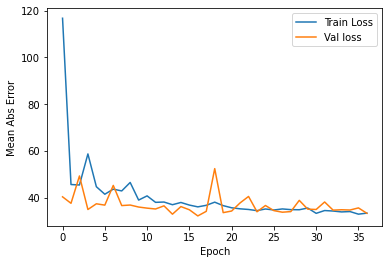

In [298]:
# If you train too long, you are prone to over-fitting
# this prevents the model from generalizing to data it has never seen before
# early stopping is one way to go about this
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Store training stats
history = model.fit(X_train, Y_train, epochs=1000,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

plot_history(history)

In [299]:
[loss, mae] = model.evaluate(X_test_n, Y_test, verbose=0)



print(f'The mean absolute Error is {mae}.')

The mean absolute Error is 3.627906084060669.


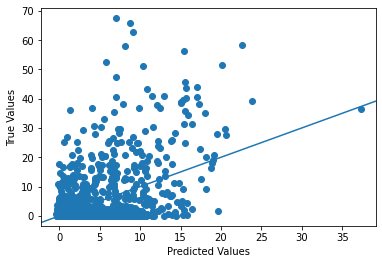

In [300]:
Y_predict = model.predict(X_test_n)

plt.scatter(Y_predict, Y_test)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_=plt.plot([-100,100],[-100,100])


In [301]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_predict)

0.29347778417168735

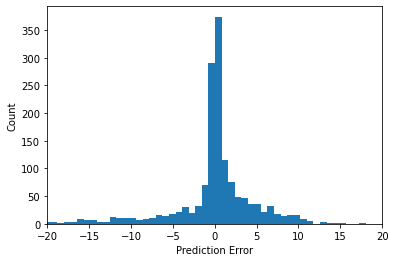

In [302]:
error = Y_predict.reshape(1535,) - Y_test
plt.xlim(-20,20)
plt.hist(error,bins = 100)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
_=plt.ylabel("Count")